Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l1,l2,l1_l2
import tensorflow as tf

seed = 7
np.random.seed(seed)


Reading Dataset

In [3]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [4]:
pd.DataFrame(df.dtypes).rename(columns = {0 : 'dtypes'})

,dtypes
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Separating Target Variable from rest of dataset

In [5]:
outcome = df.loc[:,"Outcome"]
display(outcome)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Converting Dependent Variables from Dataframe to Numpy Matrix

In [7]:
df_X = df.drop("Outcome", axis = 1)
dataset_X = df_X.values

In [10]:
print(len(dataset_X))
print(len(dataset_X[0]))

768
8


**Start of Logistic Regression Part**.
Scaling the Dataset so that Training becomes easier 

In [11]:
dataset_X = scale(dataset_X)
dataset_X.shape

(768, 8)

Splitting the Dataset into Training Testing and Validation sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, outcome.values, test_size=0.2, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

b = np.ones((460,1))

print(X_train[:5])

X_train = np.asmatrix(X_train)
y_train = np.asmatrix(y_train).T
X_test = np.asmatrix(X_test)
y_test = np.asmatrix(y_test).T
X_train.shape

[[-1.14185152 -0.09059057  0.77001375  1.66000666  1.30417549  1.75242756
   0.23896296 -0.19067191]
 [-0.54791859  2.38188392  0.04624525  4.92186584 -0.69289057  0.34362394
   0.31144581  2.44704844]
 [ 0.04601433  0.34756947 -3.57259724 -1.28821221 -0.69289057  0.1151693
  -0.51304659 -0.87137393]
 [-0.54791859 -0.49745345 -0.57412775  1.22091023  0.12330164  0.36900779
  -0.74559573 -0.70119842]
 [ 1.23388019  2.10020961  0.45982725 -1.28821221 -0.69289057  2.01895798
  -1.01136617  0.83038113]]


(460, 8)

Initializing the parameters like number of epochs, learning rate etc. before starting training

In [13]:
n_epochs = 10000
wT = np.ones((8,1))
lr = 1e-6
n_features = 8
n_samples = 460
w = np.ones((8,1))
y_actual = np.zeros((460,1))
print(wT.shape)


(8, 1)


Training the Logistic Regression Model 

In [14]:
for k in range(n_epochs): #epoch_loop

  z = np.dot(X_train,wT)
  y_actual = 1.0 / (1 + np.exp(-z))
  dz = np.dot(X_train.T,(y_actual - y_train))
  w = w - lr * dz

Weights Matrix After Training

In [15]:
print(w)

[[0.79506345]
 [0.98679884]
 [0.27464648]
 [0.23137957]
 [0.40050611]
 [0.67285176]
 [0.74494953]
 [0.70650555]]


Evaluating the Validation Set

In [16]:
val = np.dot(X_val,w)
val = 1.0 / (1 + np.exp(-val))
for i in range(len(val)):
  if(val[i]>=0.5):
    val[i] = 1.0
  else:
    val[i] = 0.0

val_count = 0.0
for i in range(len(val)):
  if(val[i]==y_val[i]):
    val_count = val_count + 1
print(val_count)
val_accuracy = val_count/len(y_val)
print(val_accuracy)


104.0
0.6753246753246753


Predicting the Test Data using the Trained Model

In [17]:
predict = np.dot(X_test,w)
predict = 1.0 / (1 + np.exp(-predict))
print(predict)

[[0.43531909]
 [0.77865324]
 [0.06333239]
 [0.20419314]
 [0.05926849]
 [0.24438617]
 [0.73644904]
 [0.85934647]
 [0.8649624 ]
 [0.90574092]
 [0.06265199]
 [0.64373378]
 [0.99169323]
 [0.50043734]
 [0.05089346]
 [0.15015774]
 [0.05959612]
 [0.96279542]
 [0.68325897]
 [0.029348  ]
 [0.26853802]
 [0.70379746]
 [0.08255347]
 [0.91335134]
 [0.00472434]
 [0.48725683]
 [0.57851447]
 [0.73074254]
 [0.13662954]
 [0.94782815]
 [0.05296518]
 [0.3240652 ]
 [0.58010495]
 [0.25419596]
 [0.88929427]
 [0.18995352]
 [0.55751906]
 [0.87781736]
 [0.05685123]
 [0.01311804]
 [0.56593273]
 [0.72879249]
 [0.62835753]
 [0.98840172]
 [0.28512908]
 [0.99952865]
 [0.98097399]
 [0.05307418]
 [0.81982468]
 [0.55715891]
 [0.85158077]
 [0.21068201]
 [0.96319236]
 [0.75679276]
 [0.29465722]
 [0.57713246]
 [0.52209705]
 [0.26618226]
 [0.25018789]
 [0.04492138]
 [0.88683146]
 [0.89220626]
 [0.94367601]
 [0.01927291]
 [0.53398747]
 [0.06665475]
 [0.40862408]
 [0.72410419]
 [0.8293205 ]
 [0.26970419]
 [0.9842442 ]
 [0.37

In [19]:
for i in range(len(predict)):
  if(predict[i]>=0.5):
    predict[i] = 1.0
  else:
    predict[i] = 0.0

print(predict)
print(predict.shape)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
(154, 1)


Evaluating the Predicted Accuracy on the Test Set

In [20]:
count = 0.0
for i in range(len(predict)):
  if(predict[i]==y_test[i]):
    count = count + 1
print(count)
accuracy = count/len(y_test)
print(accuracy)

116.0
0.7532467532467533


Calculating different Evaluation Metrics like Precision, Recall, F1 Score etc.

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

print("Accuracy: %f" % accuracy)

precision = precision_score(y_test, predict)
print("Precision: %f" % precision)

recall = recall_score(y_test, predict)
print("Recall: %f" % recall)

f1 = f1_score(y_test, predict)
print("f1_Score: %f" % f1)

kappa = cohen_kappa_score(y_test, predict)
print("Cohen's Kappa: %f" % kappa)

auc = roc_auc_score(y_test, predict)
print("ROC AUC Score: %f" % auc)

matrix = confusion_matrix(y_test, predict)
print("Confusion Matrix:")
print(matrix)

Accuracy: 0.753247
Precision: 0.608108
Recall: 0.833333
f1_Score: 0.703125
Cohen's Kappa: 0.500683
ROC AUC Score: 0.771667
Confusion Matrix:
[[71 29]
 [ 9 45]]


**Start of Neural Networks.** Scaling the model using Standard Scaler.

In [22]:
scaler = StandardScaler()
dataset_X = scaler.fit_transform(dataset_X)
#print(dataset_train[:,5])

Splitting the Dataset into Training Testing and Validation in the ratio 60:20:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, outcome.values, test_size=0.2, random_state = 5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

#print(X_train[:5])
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

Defining the model with three hidden layers with 40,25 and 15 neurons respectively and with l2 regularization of 0.2. In the hidden layers we have taken activation function as "RelU". The input diamension is equal to the number of features, 8. The output layer has "sigmoid" activation function. The model is trained with Adam optimizer with a learning rate of 1e-5 and binary-crossentropy loss for 500 epochs.

In [23]:
model = Sequential()

# model.add(Dense(1000, input_dim=8, init='uniform', activation='relu'))

model.add(Dense(40, activation='relu', input_dim=8, kernel_regularizer = l2(l=0.1)))
model.add(Dense(25, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate= 0.00001), loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1025      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 1,791
Trainable params: 1,791
Non-trainable params: 0
_________________________________________________________________
None


Training the Neural Network Model

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=8, verbose = 1)


Epoch 1/500
58/58 [==============================] - 1s 5ms/step - loss: 2.1264 - accuracy: 0.3826 - val_loss: 2.1173 - val_accuracy: 0.3701
Epoch 2/500
58/58 [==============================] - 0s 2ms/step - loss: 2.1190 - accuracy: 0.3913 - val_loss: 2.1102 - val_accuracy: 0.3766
Epoch 3/500
58/58 [==============================] - 0s 2ms/step - loss: 2.1116 - accuracy: 0.3957 - val_loss: 2.1030 - val_accuracy: 0.3896
Epoch 4/500
58/58 [==============================] - 0s 2ms/step - loss: 2.1042 - accuracy: 0.3978 - val_loss: 2.0959 - val_accuracy: 0.3896
Epoch 5/500
58/58 [==============================] - 0s 2ms/step - loss: 2.0969 - accuracy: 0.4152 - val_loss: 2.0888 - val_accuracy: 0.3961
Epoch 6/500
58/58 [==============================] - 0s 3ms/step - loss: 2.0897 - accuracy: 0.4239 - val_loss: 2.0818 - val_accuracy: 0.4026
Epoch 7/500
58/58 [==============================] - 0s 2ms/step - loss: 2.0825 - accuracy: 0.4304 - val_loss: 2.0747 - val_accuracy: 0.4091
Epoch 8/500
5

Evaluating the model on the Test Set

In [25]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.8052
accuracy: 80.52%


Plotting Training Accuracy VS Validation Accuracy

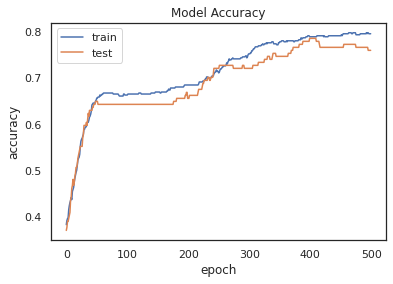

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Plotting Training Loss VS Validation Loss

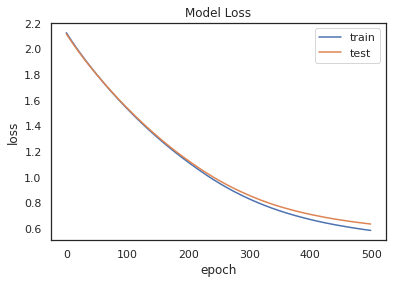

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

For Phase-3 all, our parameters remain same as the previous Neural Network Model, only instead of L2 regularization, we add a Dropout of 0.2

In [35]:
model_1 = Sequential()

# model.add(Dense(1000, input_dim=8, init='uniform', activation='relu'))

model_1.add(Dense(40, activation='relu', input_dim=8))
model_1.add(Dropout(0.2))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(15, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(optimizer=Adam(learning_rate= 0.00001), loss='binary_crossentropy', metrics=['accuracy'])

print(model_1.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                360       
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                1025      
_________________________________________________________________
dense_18 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 16        
Total params: 1,791
Trainable params: 1,791
Non-trainable params: 0
_________________________________________________________________
None


Training the model

In [33]:
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=8, verbose = 1)


Epoch 1/500
58/58 [==============================] - 1s 5ms/step - loss: 0.7221 - accuracy: 0.3957 - val_loss: 0.7188 - val_accuracy: 0.4026
Epoch 2/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.4217 - val_loss: 0.7166 - val_accuracy: 0.3961
Epoch 3/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.4196 - val_loss: 0.7143 - val_accuracy: 0.3961
Epoch 4/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4174 - val_loss: 0.7121 - val_accuracy: 0.4156
Epoch 5/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4413 - val_loss: 0.7101 - val_accuracy: 0.4156
Epoch 6/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.4609 - val_loss: 0.7080 - val_accuracy: 0.4416
Epoch 7/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.4522 - val_loss: 0.7059 - val_accuracy: 0.4416
Epoch 8/500
5

Evaluating the Model on the Test Set

In [34]:
scores_1 = model_1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model_1.metrics_names[1], scores_1[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7662
accuracy: 76.62%


Plotting Training Accuracy VS Validation Accuracy

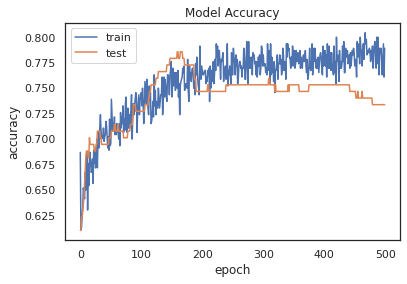

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Plotting Training Loss VS Validation Loss

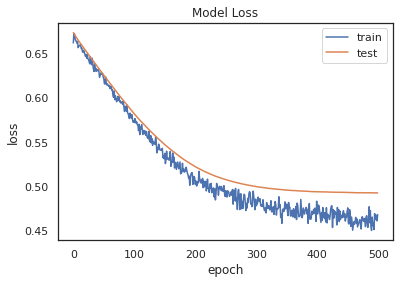

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()